# Metoda najmniejszych kwadratów

(Dzmitry, Nikitsin, Gr6)

#### Krótkie wprowadzenie

Naszym celem w metodzie najmniejszych kwadratów jest znalezienie takiego wektora parametrów $\mathbf{x}$, który minimalizuje błąd dopasowania modelu do danych. Błąd ten definiujemy jako **sumę kwadratów różnic** między wartościami rzeczywistymi $\mathbf{b}$ a przewidywanymi $A\mathbf{x}$ czyli mówiąc prościej szukamy minimalny błąd średniokwadratowy:

$$L(\mathbf{x}) = \sum_{i=1}^{m} (y_i - (A\mathbf{x})_i)^2 \to min$$

Powyższa suma to nic innego jak kwadrat normy euklidesowej (długości) wektora różnic. Możemy więc zapisać to używając wektora wyników $\mathbf{b}$ (zawierającego $y_i$) oraz macierzy danych $A$:

$$L(\mathbf{x}) = ||\mathbf{b} - A\mathbf{x}||^2$$

Korzystając z własności iloczynu skalarnego wektorów ($\mathbf{v} \cdot \mathbf{v} = \mathbf{v}^T \mathbf{v}$), zapisujemy funkcję w postaci algebraicznej:

$$(\mathbf{b} - A\mathbf{x})^T (\mathbf{b} - A\mathbf{x})$$

Po otwarciu nawiasów ostatecznie dostajemy funkcję, która jest łatwa do zminimalizowania:
$$L(\mathbf{x}) = \mathbf{b}^T \mathbf{b} - 2\mathbf{x}^T A^T \mathbf{b} + \mathbf{x}^T A^T A \mathbf{x}$$

Aby znaleźć minimum tej funkcji, musimy obliczyć jej **gradient** względem wektora $\mathbf{x}$ i przyrównać go do zera. Gradient $\nabla_{\mathbf{x}} L$ to w rzeczywistości wektor składający się ze wszystkich **pochodnych cząstkowych** funkcji po poszczególnych zmiennych $x_1, x_2, \dots, x_n$:

$$
\nabla_{\mathbf{x}} L(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial L}{\partial x_1} \\
\frac{\partial L}{\partial x_2} \\
\vdots \\
\frac{\partial L}{\partial x_n}
\end{bmatrix}
$$

Każda pochodna cząstkowa $\frac{\partial L}{\partial x_k}$ mówi nam, jak zmienia się błąd, gdy zmieniamy tylko jeden parametr $x_k$. W minimum wszystkie te zmiany muszą wynosić zero jednocześnie. Obliczając gradient (czyli wykonując operacje pochodnych cząstkowych na całym wektorze jednocześnie), otrzymujemy:
1. Pochodna wyrazu wolnego $\mathbf{b}^T\mathbf{b}$ wynosi $0$.
2. Pochodna wyrazu liniowego $-2\mathbf{x}^T A^T \mathbf{b}$ wynosi $-2A^T \mathbf{b}$.
3. Pochodna wyrazu kwadratowego $\mathbf{x}^T A^T A \mathbf{x}$ wynosi $2A^T A \mathbf{x}$.

Stawiamy warunek konieczny istnienia minimum ($\nabla_{\mathbf{x}} L = 0$):

$$-2A^T \mathbf{b} + 2A^T A \mathbf{x} = 0$$

Po przekształceniu otrzymujemy **Układ Równań Normalnych**:
$$A^T A \mathbf{x} = A^T \mathbf{b}$$

Mnożąc lewostronnie przez odwrotność macierzy $(A^T A)^{-1}$, otrzymujemy szukany wzór na $\mathbf{x}$:
$$\mathbf{x} = \underbrace{(A^T A)^{-1} A^T}_{A^+} \mathbf{b}$$

Wyrażenie $(A^T A)^{-1} A^T$ nazywamy **macierzą pseudoodwrotną Moore’a-Penrose’a** ($A^+$). Pozwala ona rozwiązać problem minimalizacji sumy kwadratów błędów jednym działaniem macierzowym.


In [7]:
import numpy as np

def pinvMP(A):
    """
    Oblicza macierz pseudoodwrotną Moore’a-Penrose’a dla macierzy A,
    korzystając z powyżej wyprowadzonego wzoru

    Zastosowanie:
    Używana do rozwiązywania nadokreślonych układów równań Ax=b
    w sensie najmniejszych kwadratów: x = A^+ b.

    :param A -- macierz numpy o wymiarach (m, n), gdzie m >= n
    :return A_pinv -- macierz pseudoodwrotna o wymiarach (n, m)
    :raise ValueError -- w przypadku, jezeli macierz jest nieodwracalna
    """

    A_T = A.T
    ATA = A_T @ A

    # Odwrócenie macierzy (A^T * A)
    try:
        ATA_inv = np.linalg.inv(ATA)
    except np.linalg.LinAlgError:
        raise ValueError("Macierz A^T A jest nieodwracalna")

    A_pinv = ATA_inv @ A_T

    return A_pinv

> **Komentarz dotyczący stabilności numerycznej:**
>
> Zaimplementowane powyżej rozwiązanie korzystające z jawnego wyznaczenia macierzy $(A^T A)^{-1}$ jest poprawne teoretycznie (algebraicznie), jednak w praktyce inżynierskiej jest uznawane za mniej stabilne numerycznie.
>
> Głównym powodem jest operacja obliczania iloczynu $A^T A$, która powoduje podniesienie do kwadratu wskaźnika uwarunkowania macierzy ($\kappa(A^T A) \approx \kappa(A)^2$). W przypadku macierzy źle uwarunkowanych (ill-conditioned), może to prowadzić do drastycznej utraty precyzji obliczeń zmiennoprzecinkowych lub błędów typu `Singular Matrix Error`, nawet jeśli wyjściowy problem jest rozwiązywalny.
>
> W bibliotekach numerycznych (jak LAPACK/NumPy) preferowane są metody omijające bezpośrednie tworzenie macierzy $A^T A$, takie jak rozkład QR (patrz Zadanie 2) lub SVD (używane domyślnie w `np.linalg.pinv`), które zachowują pierwotny wskaźnik uwarunkowania $\kappa(A)$.

---

#### ZADANIE 1
Zapiszmy nadokreślony układ równań za pomocą macierzy $A: Ax=b$. Zaimplementuj rozwiązanie problemu aproksymacji liniowej za pomocą metody najmniejszych kwadratów. Do wyznaczenia rozwiązania wykorzystaj macierz pseudoodwrotną Moore’a-Penrose’a


In [8]:
def solve_LSQ_with_MoorePenrose_matrix(A, b):
    """
    Rozwiązuje problem najmniejszych kwadratów przy użyciu macierzy pseudoodwrotnej Moore’a-Penrose’a.
    Ax = b -> x = A^+ b, gdzie A^+ jest macierzą pseudoodwrotną Moore’a-Penrose’a dla macierzy A.

    Funkcja oddelegowuje obliczenie A^+ do funkcji pomocniczej pinvMP.

    :param A: tablica 2D (array-like), macierz współczynników układu.
    :param b: tablica 1D lub 2D (array-like), wektor(y) zmiennych zależnych.
    :return: tablica 1D lub 2D reprezentująca rozwiązanie x układu Ax = b.
    """

    #A^+
    A_pseudo_inv = pinvMP(A)

    x = A_pseudo_inv @ b
    return x



---
#### ZADANIE 2
Zaimplementuj rozwiązanie problemu OLS przy pomocy macierzy pseudoodwrotnej Moore’a-Penrose’a zapisanej za pomocą macierzy Q i R uzyskanych z rozkładu oryginalnej macierzy $A$. Wykorzystaj w tym celu właśności macierzy oraz rozkładu QR.



**Wyprowadzenie macierzy pseudoodwrotnej za pomoca macierzy Q i R**


Z wyżej napisanego definicja macierzy pseudoodwrotnej to:
$$A^+ = (A^T A)^{-1} A^T$$


Wiemy, że $A = QR$.
Dla macierzy prostokątnej $A$ ($m \times n, m \ge n$), stosujemy tzw. **zredukowany rozkład QR**, gdzie:
* $Q$ jest macierzą ortonormalną o wymiarach $m \times n$ (ma własność $Q^T Q = I$).
* $R$ jest macierzą górnotrójkątną kwadratową $n \times n$ (jest odwracalna, jeśli $A$ ma pełny rząd).

Podstawiamy $A = QR$ do wzoru na $A^+$:
$$A^+ = ((QR)^T (QR))^{-1} (QR)^T = (R^T Q^T Q R)^{-1} R^T Q^T = (R^T I R)^{-1} R^T Q^T =$$
$$ = (R^T R)^{-1} R^T Q^T = R^{-1} (R^T)^{-1} R^T Q^T = R^{-1} I Q^T $$

**Wynik końcowy:**
$$A^+ = R^{-1} Q^T$$

Zatem nasze rozwiązanie $x = A^+b$ przyjmuje postać:
$$x = R^{-1} Q^T b$$



In [22]:
def solve_LSQ_with_QR(A, b):
    """
    Rozwiązuje problem OLS przy pomocy rozkładu QR i wyznaczenia
    macierzy pseudoodwrotnej z wzoru A^+ = R^-1 * Q^T.

    :param A: tablica 2D (array-like), macierz współczynników układu.
    :param b: tablica 1D lub 2D (array-like), wektor(y) zmiennych zależnych.
    :return: tablica 1D lub 2D reprezentująca rozwiązanie x układu Ax = b <=> (R^-1 * Q^T)x = b
    """

    # Q,R (mode='reduced' ->  R kwadratowe (n x n))
    Q, R = np.linalg.qr(A, mode='reduced')

    #R^-1
    R_inv = np.linalg.inv(R)

    #A^+
    A_pinv = R_inv @ Q.T

    x = A_pinv @ b
    return x

---
#### ZADANIE 4
Wygeneruj przykładowe zaszumione próbki funkcji wielomianowej jednej zmiennej. Liczba próbek powinna wynosić ok. 100 dla przedziału o długości 10. Niech będzie to wielomian co najmniej siódmego stopnia. Za pomocą implementacji metod najmniejszych kwadratów z 1. i 2. punktu znajdź funkcje aproksymujące te dane. Dobierz odpowiedni stopień wielomianu i porównaj otrzymane wyniki. Do porównania, oprócz sumy kwadratu błędów wykorzystaj trzy inne metryki (np. błąd średniokwadratowy).

Aby dopasować wielomian stopnia $d$ postaci:
$$y = w_0 + w_1x + w_2x^2 + \dots + w_dx^d$$
za pomocą metod zaimpelementowanych z `zad.1` oraz `zad.2`, przekształcono wektor wejściowy $x$ w **macierz Vandermonde’a**. Dla $m$ próbek wygląda ona następująco:

$$
A =
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^d \\
1 & x_2 & x_2^2 & \dots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \dots & x_m^d
\end{bmatrix}
$$

Wtedy wektor $w = [w_0, w_1, \dots, w_d]^T$ zawiera szukane współczynniki wielomianu.



### Metryki oceny modelu
Do porównania jakości dopasowania dla różnych stopni wielomianu wykorzystano następujące metryki, gdzie $y_i$ to wartość rzeczywista, a $\hat{y}_i$ to wartość przewidziana przez model:

1.  **SSE (Sum of Squared Errors):** Suma kwadratów błędów.
    $$SSE = \sum_{i=1}^m (y_i - \hat{y}_i)^2$$
2.  **MSE (Mean Squared Error):** Błąd średniokwadratowy.
    $$MSE = \frac{1}{m} SSE$$
3.  **RMSE (Root Mean Squared Error):** Pierwiastek błędu średniokwadratowego.
    $$RMSE = \sqrt{MSE}$$
4.  **MAE (Mean Absolute Error):** Średni błąd bezwzględny.
    $$MAE = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|$$

-------

W celu weryfikacji poprawności zaimplementowanych metod aproksymacji, jako funkcję bazową do generowania danych wybrano **Wielomian Czebyszewa pierwszego rodzaju stopnia 8**, oznaczany jako $T_8(x)$.

#### Dlaczego ten wybór?
Wielomiany Czebyszewa odgrywają fundamentalną rolę w teorii aproksymacji ze względu na swoje unikalne własności:
1.  **Silna oscylacja (Stress-test):** Wielomian $T_n(x)$ w przedziale $[-1, 1]$ posiada $n$ miejsc zerowych oraz $n+1$ ekstremów lokalnych, przyjmujących na przemian wartości $-1$ i $1$. Dla stopnia 8 oznacza to bardzo dużą zmienność funkcji (gęste "falowanie"). Jest to doskonały test dla algorytmu regresji – sprawdza, czy model potrafi uchwycić skomplikowaną strukturę danych, czy też ulegnie zjawisku *underfittingu* (wygładzenia).
2.  **Własność minimaksowa:** Użycie funkcji o charakterystyce Czebyszewa pozwala na analizę zachowania modelu na krańcach przedziału, gdzie standardowe wielomiany (w bazie potęgowej) często wykazują niestabilność (efekt Rungego).

#### Definicja matematyczna
Wielomiany Czebyszewa definiowane są rekurencyjnie:
$$T_0(x) = 1$$
$$T_1(x) = x$$
$$T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)$$

W naszym eksperymencie użyjemy wielomianu $T_8(x)$, który po rozwinięciu do bazy potęgowej przyjmuje postać:
$$T_8(x) = 128x^8 - 256x^6 + 160x^4 - 32x^2 + 1$$

Eksperyment zostanie przeprowadzony na znormalizowanym przedziale $x \in [-1, 1]$, z dodanym szumem losowym o rozkładzie normalnym, aby zasymulować rzeczywiste warunki pomiarowe.

In [40]:
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev

# funkcja Generująca Dane (Wielomian Czebyszewa)
def generate_chebyshev_data(n_samples=100, noise_std=0.3):
    """
    Generuje zaszumione próbki na podstawie wielomianu Czebyszewa 8. stopnia (T8).
    :return: x (próbki), y_true (idealne), y_noisy (zaszumione)
    """
    #definicja wielomianu T8: [0,0,0,0,0,0,0,0,1] -> 1*T8
    #P(x) = 0 x T_0 + 0 x T_1 + ... + 0 x T_7 + 1 x T_8(x)
    cheb_poly = Chebyshev([0]*8 + [1])

    # 128x^8 - 256x^6 + 160x^4 - 32x^2 + 1
    p_true = cheb_poly.convert(kind=np.polynomial.Polynomial)

    # generowanie próbek w naturalnym przedziale Czebyszewa [-1, 1]
    x = np.linspace(-1, 1, n_samples)
    y_ideal = p_true(x)

    # szum
    np.random.seed(13)
    noise = np.random.normal(0, noise_std, size=len(x))
    y_noisy = y_ideal + noise

    return x, y_ideal, y_noisy

# funkcja Tworząca Macierz Vandermonde

def create_vandermonde_matrix(x, degree):
    """
    Tworzy macierz Vandermonde'a dla wektora x i zadanego stopnia wielomianu.
    Kolejność potęg: rosnąca (1, x, x^2, ..., x^d)
    Z w_0 * 1 + w_1 x + w_2 x^2 dla [x1, x2, ..., xd]
    tworzymy macierz postaci
    1  x1^1  x1^2  ... x1^d
    1  x2^1  x2^2  ... x2^d
    itd
    degree + 1 aby uwzględnic wyraz wolny
    """

    return np.vander(x, degree + 1, increasing=True)

# funkcja Obliczająca Metryki ---

def calculate_metrics(y_true, y_pred):
    """
    Oblicza zestaw metryk porównujących predykcję z danymi rzeczywistymi (lub zaszumionymi).
    :return słownik z wynikami: SSE, MSE, RMSE, MAE.
    """
    residuals = y_true - y_pred
    sse = np.sum(residuals**2)
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))

    return {
        "SSE": sse,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }


def run_polynomial_experiment(degrees, x, y_noisy, y_ideal):
    """
    Przeprowadza serię aproksymacji dla różnych stopni wielomianu.
    Rysuje wykres i wypisuje tabelę metryk.
    """
    plt.figure(figsize=(12, 7))

    # rysowanie danych bazowych
    plt.scatter(x, y_noisy, color='gray',label='Pomiary zaszumione')
    plt.plot(x, y_ideal, 'k--', linewidth=2, label='Oryginał (Czebyszew T8)')

    colors = ['green', 'blue', 'orange', 'purple']

    for i, deg in enumerate(degrees):
        #tworzenie macierzy Vandermonde -> A(vander)
        A = create_vandermonde_matrix(x, deg)

        #rozwiązanie układy Ax = b -> x
        coffs = solve_LSQ_with_MoorePenrose_matrix(A, y_noisy)

        # obliczenie wartości przewidywanych (y = Aw) z celu narysowania wykresu
        y_pred = A @ coffs

        # obliczenie metryk
        m = calculate_metrics(y_noisy, y_pred)
        print(f"{i + 1}. stopień: {deg}, SSE: {m['SSE']:.4f}, MSE: {m['MSE']:.4f}, RMSE: {m['RMSE']:.4f}, MAE: {m['MAE']:.4f}")
        plt.plot(x, y_pred, color=colors[i], linewidth=2, label=f'Aproksymacja st. {deg}')

    # Finalizacja wykresu
    plt.title(f"Porównanie aproksymacji wielomianami różnych stopni {degrees}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)

1. stopień: 4, SSE: 57.1466, MSE: 0.5715, RMSE: 0.7560, MAE: 0.6628
2. stopień: 8, SSE: 7.4177, MSE: 0.0742, RMSE: 0.2724, MAE: 0.2187
3. stopień: 12, SSE: 7.1671, MSE: 0.0717, RMSE: 0.2677, MAE: 0.2189


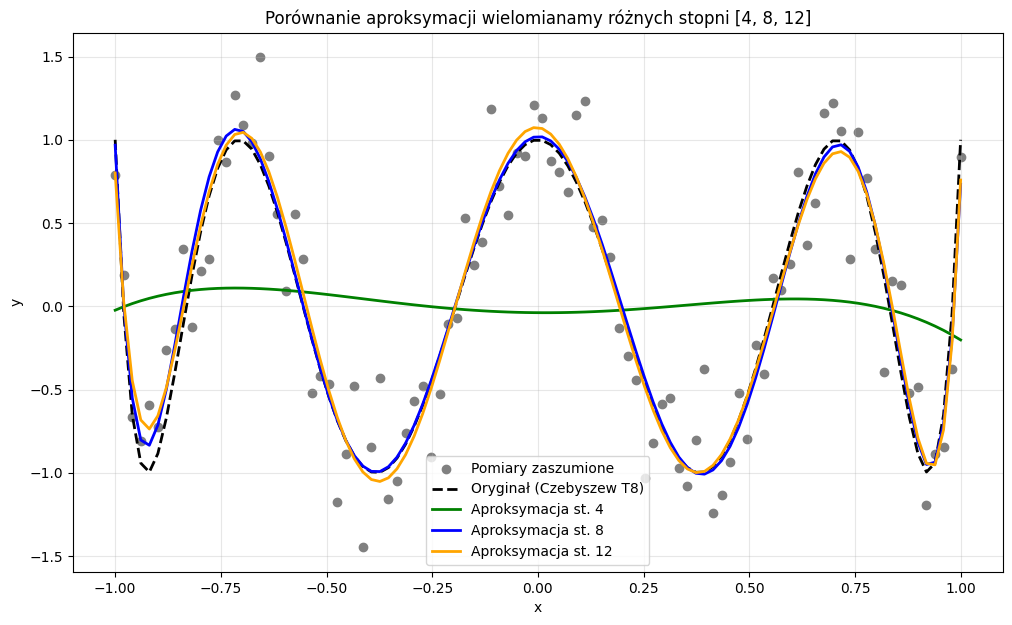

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -9.79797980e-01,  9.60004081e-01,
        -9.40610059e-01,  9.21607836e-01, -9.02989496e-01,
         8.84747284e-01, -8.66873601e-01,  8.49361003e-01],
       [ 1.00000000e+00, -9.59595960e-01,  9.20824406e-01,
        -8.83619379e-01,  8.47917586e-01, -8.13658290e-01,
         7.80783207e-01, -7.49236411e-01,  7.18964233e-01],
       [ 1.00000000e+00, -9.39393939e-01,  8.82460973e-01,
        -8.28978490e-01,  7.78737370e-01, -7.31541165e-01,
         6.87205337e-01, -6.45556529e-01,  6.06431891e-01],
       [ 1.00000000e+00, -9.19191919e-01,  8.44913784e-01,
        -7.76637923e-01,  7.13879303e-01, -6.56192087e-01,
         6.03166463e-01, -5.54425739e-01,  5.09623659e-01],
       [ 1.00000000e+00, -8.98989899e-01,  8.08182838e-01,
        -7.26548208e-01,  6.53159500e-01, -5.871837

In [42]:
x_samples, y_true, y_data = generate_chebyshev_data(n_samples=100, noise_std=0.3)
degrees_to_test = [4, 8, 12]
run_polynomial_experiment(degrees_to_test, x_samples, y_data, y_true)
create_vandermonde_matrix(x_samples, 8)

### Wnioski z analizy aproksymacji wielomianowej

Na podstawie przeprowadzonego eksperymentu, analizy wykresu oraz zestawienia metryk błędów (SSE, MSE, RMSE, MAE), można sformułować następujące obserwacje dotyczące doboru stopnia wielomianu:

**1. Niedopasowanie modelu (Underfitting) – Stopień 4**
* **Analiza wizualna:** Zielona krzywa na wykresie jest zbyt gładka i nie potrafi odwzorować częstotliwości oscylacji oryginalnej funkcji (Wielomianu Czebyszewa $T_8$). Model ignoruje większość ekstremów lokalnych.
* **Analiza metryk:** Błędy dla tego stopnia są o rząd wielkości wyższe niż dla pozostałych (MSE $\approx 0.57$ vs $0.07$). Wskazuje to na zbyt małą pojemność modelu (zbyt niską wariancję, zbyt wysokie obciążenie). Model nie jest w stanie uchwycić struktury danych.

**2. Optymalne dopasowanie – Stopień 8**
* **Analiza wizualna:** Niebieska krzywa niemal idealnie pokrywa się z linią przerywaną oznaczającą prawdziwą funkcję (oryginał). Model poprawnie odtwarza wszystkie "górki i dołki" funkcji $T_8$.
* **Analiza metryk:** Nastąpił drastyczny spadek błędu średniokwadratowego (MSE) z poziomu $0.57$ do $0.074$. Jest to wynik oczekiwany, ponieważ stopień modelu (8) jest zgodny ze stopniem wielomianu generującego dane. Jest to punkt optymalny.

**3. Ryzyko przeuczenia (Overfitting) – Stopień 12**
* **Analiza metryk:** Wielomian 12. stopnia osiągnął najniższe wartości błędów (SSE $\approx 7.16$), jednak poprawa względem stopnia 8. jest marginalna (zaledwie o ok. 3%).
* **Interpretacja:** Spadek błędu wynika z faktu, że model o wyższym stopniu ma większą swobodę i zaczyna dopasowywać się do losowego szumu pomiarowego ($\epsilon$), a nie tylko do użytecznego sygnału. Zwiększanie stopnia wielomianu powyżej rzędu rzeczywistej funkcji nie przynosi korzyści w odwzorowaniu trendu, a zwiększa koszt obliczeniowy i ryzyko niestabilności na krańcach przedziału.
---